In [32]:
import xarray as xr 
import matplotlib.pylab as plt
import geopandas
import rioxarray

In [33]:
luc_modis = xr.open_dataarray("/data/ABOVE/Final_data/LUC/geographic/LULC_2003_2014.nc")
luc_clm = xr.open_dataarray("/data/ABOVE/MODIS/LAI_CLM_DOMAIN/processed/LUC_regridded_clm.nc")
luc_clm = luc_clm.rename({"lat":"y","lon":"x"})
lst_modis = lst = xr.open_dataarray("/data/ABOVE/Final_data/LST_Final/LST/Annual_Mean/geographic/lst_mean_annual.nc")
lst_clm = xr.open_dataset("/data/ABOVE/MODIS/LAI_CLM_DOMAIN/processed/lst_mean_annual_regridded_final.nc")
lst_clm = lst_clm["__xarray_dataarray_variable__"]

In [37]:
geodf = geopandas.read_file("/data/home/hamiddashti/mnt/nasa_above/working/modis_analyses/Alaska_geographic.shp")
lst_modis = lst_modis.rio.write_crs(4326)
lst_modis_clipped = lst_modis.rio.clip(geodf.geometry.values, geodf.crs)
lst_clm = lst_clm.rio.write_crs(4326)
lst_clm_clipped = lst_clm.rio.clip(geodf.geometry.values, geodf.crs)

In [39]:
lst_modis_mean = lst_modis_clipped.mean(dim=["lat","lon"])
lst_clm_mean = lst_clm_clipped.mean(dim=["x","y"])

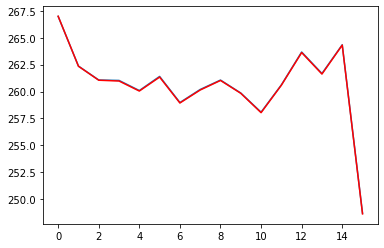

In [41]:
plt.plot(lst_modis_mean.values,'b')
plt.plot(lst_clm_mean.values,'r')


In [21]:
luc_clm = luc_clm.rio.write_crs(4326)
geodf = geopandas.read_file("/data/ABOVE/Final_data/shp_files/CoreDomain_geographic.shp")
luc_clm_clipped = luc_clm.rio.clip(geodf.geometry.values, geodf.crs)


In [29]:
geodf = geopandas.read_file("/data/home/hamiddashti/mnt/nasa_above/working/modis_analyses/area_test.shp")
lst_modis = lst_modis.rio.write_crs(4326)
lst_modis_clipped = lst_modis.rio.clip(geodf.geometry.values, geodf.crs)

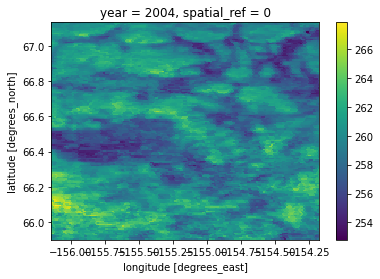

In [31]:
lst_modis_clipped.isel(year=2).plot()

In [85]:
luc_modis_diff = luc_modis.diff(dim="year")
luc_clm_diff = clipped.diff(dim="year")

KeyboardInterrupt: 

In [ ]:
luc_clm_diff_mean =luc_clm_diff.mean(dim=["x","y"]) 
luc_modis_diff_mean =luc_modis_diff.mean(dim=["x","y"]) 

In [ ]:
def_modis = luc_modis_diff_mean.isel(band=0)
def_clm = luc_clm_diff_mean.isel(band=0)


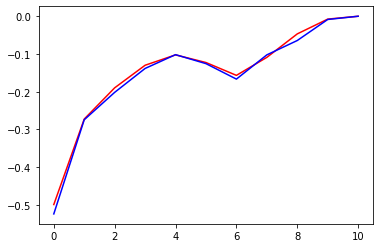

In [ ]:
plt.plot(def_modis.values,"red")
plt.plot(def_clm.values,"blue")

In [87]:
luc_modis_mean = luc_modis.mean(dim=["x","y"])
luc_clm_mean = clipped.mean(dim=["x","y"])

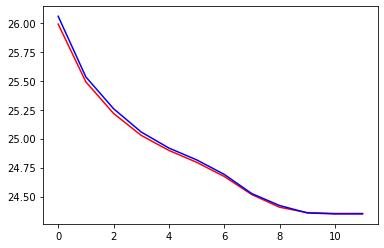

In [92]:
plt.plot(luc_modis_mean.isel(band=0),'red')
plt.plot(luc_clm_mean.isel(band=0),'blue')


In [123]:
# what year has the greatest loss in EF? 

lcc_modis_2004 = luc_modis_diff.isel(band=0,year=1)
lcc_clm_2004 = luc_clm_diff.isel(band=0,year=1)
lcc_modis_2004.to_netcdf("/data/home/hamiddashti/mnt/nasa_above/working/modis_analyses/lcc_modis_2004.nc")
lcc_clm_2004.to_netcdf("/data/home/hamiddashti/mnt/nasa_above/working/modis_analyses/lcc_clm_2004.nc")


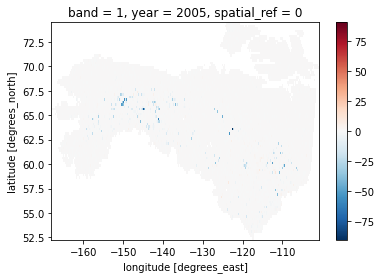

In [127]:
lcc_clm_2004.plot()